# Laborator I

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import copy

**Citirea unei imagini color**

In [2]:
image = cv.imread("C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\butterfly.jpeg")
print("Dimensiunea variabilei: ", image.shape)

Variabila *image* este de tipul numpy-array uint8. Dimensiunea variabilei este de H, W, 3, unde H este înălțimea imaginii, W este lățimea imaginii, iar 3 reprezintă numărul de coloane RGB.

**Citirea unei imagini în tonuri de gri**

In [3]:
image = cv.imread("C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\butterfly.jpeg", cv.IMREAD_GRAYSCALE)
print("Dimensiunea variabilei: ", image.shape)

Dimensiunea variabilei este de: H, W.

**Afișarea unei imagini**

In [4]:
cv.imshow('Butterfly GRAYSCALE', image)
cv.waitKey(0) # se asteapta apasarea unei taste
cv.destroyAllWindows() # se inchide fereastra

**Operații cu o matrice de intensități**

Fie *img* un numpy-array 100x100 de tipul uint8 obținută astfel:

In [5]:
path = "C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\"

img = cv.resize(cv.cvtColor((cv.imread(path+"football.jpg")), cv.COLOR_BGR2GRAY), (100, 100))
H, W = img.shape

cv.imshow('Football GRAYSCALE', img)
cv.waitKey(0)
cv.destroyAllWindows()

ce corespunde unei imagini de intensități.

#### Cerințe:

a) Sortați elementele/intensitățile din matricea img, punând elementele sortate în vectorul coloana x de dimensiuni 10000 x 1. Plotați apoi valorile din x( ca funcție de indecșii lui x, folosind librăria Matplotlib).

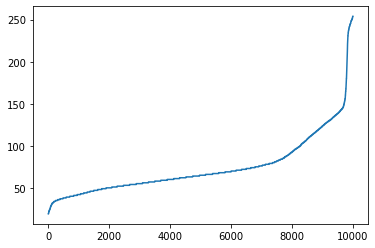

In [6]:
x = np.sort(img.flatten())
plt.plot(np.arange(len(x)), x)
plt.show()

<br> b)Afișați submatricea din *img* de dimensiuni 50 × 50 care corespunde sfertului matricei *img* din partea dreapta-jos.

In [7]:
A = copy.deepcopy(img[50:,50:])
cv.imshow('Submatricea dreapta jos', A)
cv.waitKey(0)
cv.destroyAllWindows()

<br> c) Aflați pragul de intensitate *t* cu proprietatea următoare: jumătate din elementele matricei *img* au o valoare ≤ *t*.

In [8]:
t = np.median(x)
print(t)

65.0


<br> d) Creați și afișați matricea/imaginea B, de aceleași dimensiuni ca matricea *img* obținută din *img* astfel: fiecare pixel din B are culoarea albă (intensitate = 255) dacă pixelul corespunzător din *img* are intensitate $\geq$ t, altfel are culoarea neagră (intensitate = 0).

In [9]:
B = copy.deepcopy(img)
B[B < t] = 0
B[B >= t] = 255
cv.imshow('Imaginea B', B)
cv.waitKey(0)
cv.destroyAllWindows()

<br> e) Creați și afișați matricea/imaginea C, de aceleași dimensiuni ca matricea *img* obținută din *img* astfel: fiecare pixel din C are intensitatea egală cu pixelul corespunzător din *img* din care se scade intensitatea medie a imaginii *img*; pixelii astfel obținuți cu intensitatea < 0 vor fi setați ca având intensitatea egală cu 0.

In [10]:
intensitatea_medie = img.mean()
print('Intensitatea medie este {} ({})'.format(intensitatea_medie, intensitatea_medie.dtype))
C = copy.deepcopy(img)
print('Intensitatea minima(inainte de transformare): ', C.min())
print('Intensitatea maxima(inainte de transformare): ', C.max())
C = C - intensitatea_medie
C[C < 0] = 0
C = np.uint8(C)
print('Intensitatea minima: ', C.min())
print('Intensitatea maxima: ', C.max())
cv.imshow('Imaginea C', C)
cv.waitKey(0)
cv.destroyAllWindows()

Intensitatea medie este 74.2772 (float64)
Intensitatea minima(inainte de transformare):  19
Intensitatea maxima(inainte de transformare):  254
Intensitatea minima:  0
Intensitatea maxima:  179


<br> f) Aflați valoarea minimă (np.min) a intensități și afișați pozițiile în care apare în *img*.

In [11]:
intensitate_minima = img.min()
linie,coloana = np.where(img == intensitate_minima)
print(linie, coloana)

[76 88] [68 50]


### Imaginea medie a unei colecții de imagini

O colecție de imagini similare poate fi descrisă de imaginea sa medie.

Scrieți o funcție Python care, pentru o colecție de imagini dată, realizează următoarele:
* calculează imaginea medie color a colecției
* calculează imaginea medie de intensitate a colecției
* calculează matricea X, fiecare element X[i,j] al matricei reprezintă deviația standard a intensităților pixelilor (i,j) din imaginile de intensitate corespunzătoare imaginilor colecției
* afișează cele trei imagini (img_color, img_gray, X) calculate

In [12]:
import os

dir_path = "C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\colectiiImagini\\colectiiImagini\\"

def colectii_imagini(dir_path):
    img_names = os.listdir(dir_path)
    color_images, gray_images = [], []
    
    for image_name in img_names:
        img_color_current = cv.imread(dir_path + image_name)
        color_images.append(img_color_current)
        img_gray_current = cv.cvtColor(img_color_current, cv.COLOR_BGR2GRAY)
        gray_images.append(img_gray_current)
        
    color_images = np.array(color_images)
    gray_images = np.array(gray_images)
        
    mean_color_image = np.uint8(np.mean(color_images, axis=0))
    mean_intensity_image = np.uint8(np.mean(gray_images, axis=0))
    X = np.uint8(np.std(gray_images, axis=0))
    
    cv.imshow('Imaginea medie color a colectiei', mean_color_image)
    cv.waitKey(8000)
    cv.destroyAllWindows()
    
    cv.imshow('Imaginea medie de intensitate a colectiei', mean_intensity_image)
    cv.waitKey(8000)
    cv.destroyAllWindows()
    
    cv.imshow('Deviatia standard', X)
    cv.waitKey(8000)
    cv.destroyAllWindows()
        
        
colectii_imagini(dir_path + "set2\\")

### Modificarea unei imagini

Citiți imaginea *butterfly.jpeg* în variabila *img*. Extrageți 500 de sub-imagini de dimensiune $20 x 20$ din poziții aleatorii ale imaginii *img*. Modificați porțiunea din imagine care are colțul stang-sus în poziția (250,250) cu cea mai apropiată sub-imagine (din cele 500) conform distanței $L_2$. Salvați imaginea obținută.

In [37]:
img = cv.imread("C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\butterfly.jpeg")
H, W, c = img.shape

nb_images = 500
window_size = 20
# coltul din stanga sus e parametrizat de (y,x)
y = np.random.randint(0, H - window_size + 1, size=(nb_images,))
x = np.random.randint(0, W - window_size + 1, size=(nb_images,))

img_crop = img[250:250+window_size,250:250+window_size,:].copy()

distances = np.zeros(nb_images)
for i in range(0, nb_images):
    image_window = img[y[i]:y[i]+window_size,x[i]:x[i]+window_size,:].copy()
    # distanta L2
    distances[i] = np.sqrt(np.sum((np.float32(img_crop) - np.float32(image_window))**2))

idx = distances.argmin()
image_reconstructed = img.copy()
image_reconstructed[250:250+window_size,250:250+window_size,:] = img[y[idx]:y[idx]+window_size,x[idx]:x[idx]+window_size,:]

cv.imshow('Image reconstructed', image_reconstructed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite("C:\\Users\\Dana\\Desktop\\University\\Anul 3\\CV\\Laborator1_materiale\\butterfly_reconstructed.jpeg", image_reconstructed)

True